In [1]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns
import numpy as np
import polars.selectors as cs

In [2]:
df = pd.read_excel(r"../dano_base.xlsx")

In [4]:
df = df[df.age_segment != 'Пусто' ]

In [7]:
df = df.dropna(subset=['subscription_time'])

In [8]:
df['trial_type'] = df['trial_type'].fillna(0)

In [10]:
new_column = {'0-13':1,
             '14-17':2,
             '18-22':3,
             '23-25':4,
             '26-30':5,
             '31-35':6,
             '36-40':7,
             '41-45':8,
             '46-50':9,
             '51-55':10,
             '56-60':11,
             '61-65':12,
             '65+':13}
df.insert(1,'age_category',df['age_segment'].map(new_column))

In [16]:
df = df.loc[(df['trial_type'] == '1 mon')]

In [17]:
df['trial_type'].value_counts()

trial_type
1 mon    30502
Name: count, dtype: int64

In [18]:
df

,Unnamed: 0,age_category,application_id,primary_income_dt,party_rk,product_code,account_own_flg,sch_flg,success_flg,validation_flg,...,inkas_flg,cash_out_flg,vzr_flg,concierge_flg,cb_flg,invest_flg,mobile_flg,out_c2c_flg,car_ins_flg,percent_flg
1,1,2.0,2e23732fef4749e1ae7a89ec978b7bf7,2023-03-05,858351423.0,DCV,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,7.0,df795c04bd834c0d8a2960d3b0593938,2023-03-09,864683115.0,DCV,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,6,3.0,a1ed0e65df5242fcaf08713a4e90948e,2023-03-29,753966360.0,DCV,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
16,16,5.0,6e35627b117c405b99a211ca9d587f41,2023-03-13,321565424.0,DCV,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
21,21,2.0,fb74719b24ff4faa830a954a5e77b482,2023-03-23,755253087.0,DCV,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73703,73703,2.0,461d7cf81bd5430899cec42a6fb18741,2023-03-30,698060918.0,DCV,1,1,1,0,...,0,0,0,0,0,1,0,0,0,0
73704,73704,4.0,9dd6813da8b64ce69d66933022e93ee0,2023-03-30,852830245.0,DCV,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
73705,73705,7.0,c3d9072737e24388a88227d08399a4bb,2023-03-04,803521909.0,DCV,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
73707,73707,6.0,8168937fbe4c447ca420614d4e032d94,2023-03-14,380072334.0,DCV,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
Q1 = df.in_total_5ms_amt.quantile(0.25)
Q3 = df.in_total_5ms_amt.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df.in_total_5ms_amt < (Q1 - 1.5 * IQR)) |(df.in_total_5ms_amt > (Q3 + 1.5 * IQR)))]

<Axes: >

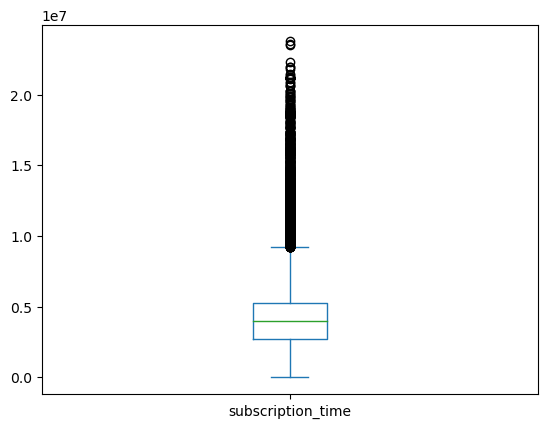

In [34]:
df.subscription_time.plot.box()

In [32]:
pl.from_pandas(df).groupby("age_category").agg(
    mean_zp = (pl.col("in_total_5ms_amt")/5).mean(),
    median_zp = (pl.col("in_total_5ms_amt")/5).median(),
    percent25 = (pl.col("in_total_5ms_amt")/5).quantile(0.25),
    percent75 = (pl.col("in_total_5ms_amt")/5).quantile(0.75)
).sort(by="age_category").to_pandas()

C:\Users\koran\AppData\Local\Temp\ipykernel_5532\2375665465.py:1: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  pl.from_pandas(df).groupby("age_category").agg(


,age_category,mean_zp,median_zp,percent25,percent75
0,NaN,44363.718222,6033.140,0.000,68417.820
1,1.0,11676.925140,5815.358,1459.196,12165.164
2,2.0,29415.808958,12119.208,2031.758,38808.554
3,3.0,51981.022359,29843.706,4340.958,82298.138
4,4.0,60021.998620,35068.864,5065.458,97884.440
5,5.0,56787.232228,33470.087,4211.900,92759.596
6,6.0,51875.764823,25541.826,2511.810,85674.704
7,7.0,45401.224953,18996.535,1391.602,74685.074
8,8.0,43904.088723,17710.698,1656.306,66202.226
9,9.0,41565.762231,13212.216,929.682,59729.360


C:\Users\koran\AppData\Local\Temp\ipykernel_5532\286833784.py:1: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  sns.barplot(data = pd.melt(pl.from_pandas(df).groupby("age_category").agg(


<Axes: xlabel='age_category', ylabel='value'>

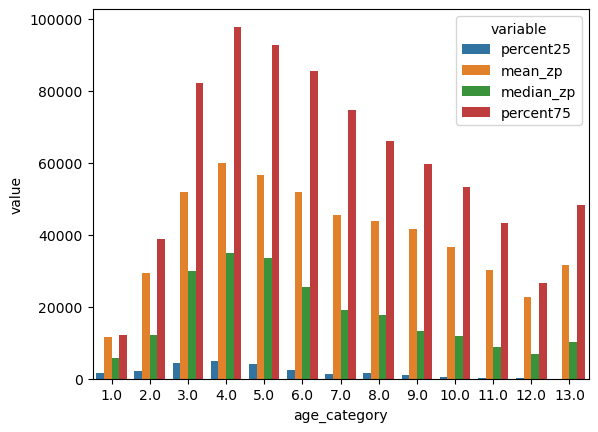

In [33]:
sns.barplot(data = pd.melt(pl.from_pandas(df).groupby("age_category").agg(
    mean_zp = (pl.col("in_total_5ms_amt")/5).mean(),
    median_zp = (pl.col("in_total_5ms_amt")/5).median(),
    percent25 = (pl.col("in_total_5ms_amt")/5).quantile(0.25),
    percent75 = (pl.col("in_total_5ms_amt")/5).quantile(0.75)
).sort(by="age_category").to_pandas(),
id_vars="age_category", value_vars=["percent25","mean_zp", "median_zp", "percent75"]),
x = "age_category", y = "value", hue="variable")